In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# New Section

In [3]:
#Downloading Dataset

# Install Kaggle library
!pip install -q kaggle
!echo '{"username":"vivank","key":"e466500d397f401fc52798122c90b0dc"}' > /root/.kaggle/kaggle.json
!kaggle datasets download -d rishianand/devanagari-character-set/dataset.csv
!unzip /content/devanagari-character-set.zip

 93% 93.0M/100M [00:01<00:00, 55.7MB/s]
100% 100M/100M [00:01<00:00, 67.0MB/s] 
Archive:  /content/devanagari-character-set.zip
  inflating: Images.zip              
  inflating: data.csv                


This notebook is basically an introduction to using keras's CNN for modeling the devanagiri data set. Keras is a wrapper library who's backend can be either Tensorflow, CNTK or Theano. It's very friendly for quick prototyping and testing ideas (of course, provided your model doesn't take days to compile as well :D ) I use the tensorflow-gpu backend for Keras.

So let's get down to it.

# **Import relevant libraries**

In [4]:
# Standard useful data processing imports
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


Let's have a look at the data now

In [6]:
# Import the data
dataset = pd.read_csv("data.csv")
print(dataset.head())

   pixel_0000  pixel_0001  pixel_0002  ...  pixel_1022  pixel_1023        character
0           0           0           0  ...           0           0  character_01_ka
1           0           0           0  ...           0           0  character_01_ka
2           0           0           0  ...           0           0  character_01_ka
3           0           0           0  ...           0           0  character_01_ka
4           0           0           0  ...           0           0  character_01_ka

[5 rows x 1025 columns]


A row-major arrangement of 32 x 32 image data in each row with an additional column being the label at the end. Let's just keep them in suitable containers for further use and clear unwanted memory.

In [0]:
x = dataset.values[:,:-1] / 255.0
y = dataset['character'].values
n_classes = 46 # Number of classes

Let's have a look at some of the images. Resize and plot the columns(pixels) in a row.

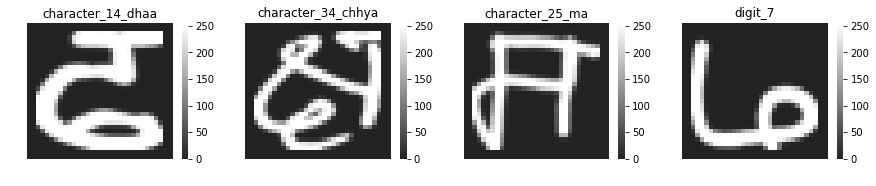

In [8]:
# Now let's visualise a few random images
img_width_cols = 32
img_height_rows = 32
cutsomcmap = sns.dark_palette("white", as_cmap=True)
random_idxs = random.sample(range(1, len(y)), 4)
plt_dims = (15, 2.5)
f, axarr = plt.subplots(1, 4, figsize=plt_dims)
it = 0
for idx in random_idxs:
    image = x[idx, :].reshape((img_width_cols, img_height_rows)) * 255
    axarr[it].set_title(y[idx])
    axarr[it].axis('off')
    sns.heatmap(data=image.astype(np.uint8), cmap=cutsomcmap, ax=axarr[it])
    it = it+1

At this points, we can split the data into training and validation (test) - an 80/20 split.

We can also encode our labels.

To do that we first convert the string into Labels.

So all the "character_XX_YY" labels would be mapped to labels ranging from 0 to 45 ( Because we have 46 classes)

After that, we prepare this to be used by Keras by using its to_categorical function.

In [0]:
# Let's split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

Now we shall build the CNN!

Actually, no.

We'll have to do one final step of reshaping ALL the data before we go forward to build it.

Why do we need to reshape the data? Because each data point is in the form of a single row. In this CNN example, we're going to work with IMAGES.

The CNN needs images to extract coarse and fine features so that it can train and classify them.

So a quick step -



In [0]:
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)


And NOW we make the model.

Let's first define a model. Here we shall use the keras Sequential model, which essentially involves us adding a layer one after the other....sequentially.

In [11]:
cnn = Sequential()

W0707 14:45:22.787579 139939510839168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



The real fun part is defining the LAYERS.

The first layer, a.k.a the input layer requires a bit of attention in terms of the shape of the data it will be looking at.

So just for the first layer, we shall specify the input shape, i.e., the shape of the input image - rows, columns and number of channels.

Keras also has this neat API that joins the convolutional and activation layers into 1 API call.



In [12]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)


W0707 14:45:27.599536 139939510839168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 14:45:27.617162 139939510839168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



So a common trick here used when developing CNN architectures is to add two Convolution+Activation layers back to back BEFORE we proceed to the pooling layer for downsampling.

This is done so that the kernel size used at each layer can be small.

when multiple convolutional layers are added back to back, the overall effect of the multiple small kernels will be similar to the effect produced by a larger kernel, like having two 3x3 kernels instead of a 7x7 kernel. (Reference link coming soon!)

In [13]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

W0707 14:45:32.725312 139939510839168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Let's do this again. i.e, One more ConvAct + ConvAct + Pool layer sequence.

In [0]:
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

Here's an interesting part. Two common problems with most models is that they either underfit, or they overfit. With a simple CNN such as this, there is a high probability that your model would begin overfitting the data. i.e, it relies on the training data too much.

There are multiple ways to address the problem of overfitting. This is a pretty neat [site](https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d) which talks about this succintly.

We have 92000 data points to play with. I'm avoiding augmentation for the same reason.

For our case, we will use a simple Dropout layer to make sure the network does not depend on the training data too much.

In [15]:
# Let's deactivate around 20% of neurons randomly for training
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

W0707 14:45:41.411996 139939510839168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0707 14:45:41.428325 139939510839168 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


we are done with the Convolutional layers, and will proceed to send this data to the Fully Connected ANN. To do this, our data must be a 1D vector and not a 2D image. So we flatten it.

In [0]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

And proceed to the ANN -



In [0]:
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_1)

Our problem is classification. So succeeding the final layer, we use a softmax activation function to classify our labels.

In [0]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

Almost done. Now we just need to define the optimizer and loss functions to minimize and compile the CNN

In [19]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)


W0707 14:45:53.032018 139939510839168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 14:45:53.070872 139939510839168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



And now we train our model! 

In [20]:
history = cnn.fit(x_train, y_train,
                  batch_size=32, epochs=20,
                  validation_data=(x_test, y_test))

W0707 14:45:55.303645 139939510839168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 73600 samples, validate on 18400 samples
Epoch 1/20
73600/73600 [==============================] - 55s 753us/step - loss: 0.6392 - acc: 0.8118 - val_loss: 0.2167 - val_acc: 0.9320
Epoch 2/20
73600/73600 [==============================] - 48s 649us/step - loss: 0.1710 - acc: 0.9461 - val_loss: 0.1280 - val_acc: 0.9617
Epoch 3/20
73600/73600 [==============================] - 48s 649us/step - loss: 0.1126 - acc: 0.9647 - val_loss: 0.1561 - val_acc: 0.9529
Epoch 4/20
73600/73600 [==============================] - 48s 649us/step - loss: 0.0838 - acc: 0.9734 - val_loss: 0.0929 - val_acc: 0.9737
Epoch 5/20
73600/73600 [==============================] - 48s 648us/step - loss: 0.0649 - acc: 0.9794 - val_loss: 0.0777 - val_acc: 0.9767
Epoch 6/20
73600/73600 [==============================] - 48s 646us/step - loss: 0.0579 - acc: 0.9815 - val_loss: 0.0738 - val_acc: 0.9797
Epoch 7/20
73600/73600 [==============================] - 48s 649us/step - loss: 0.0493 - acc: 0.9843 - val_loss: 0.

Let's see how well we did by looking at accuracy.



In [21]:
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 98.30%


Plot a graph of how the model learnt over its epochs -

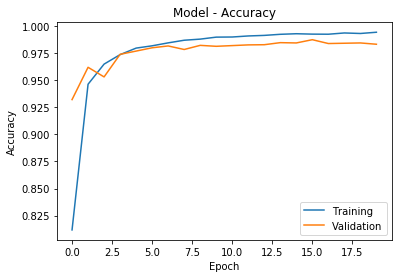

In [22]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


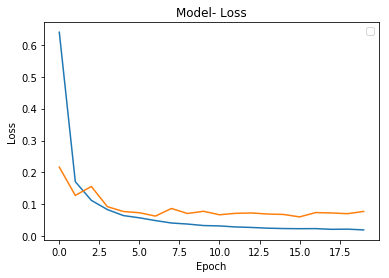

In [23]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

And that would be all.

#Thanks!